In [16]:
import numpy as np
import os
import pandas as pd
import struct
import matplotlib.pyplot as plt
from utils.event2d import event2d as event2d
from utils.helper import *

plt.style.use("MC.mplstyle")


In [17]:
fileName = "../Recordings/1khz_close_array_wider.dat"
events = read_dat_file(fileName)
ev = remove_ts_offset(events)
g9 = gaia9_extractor(events)
g1 = gaia1_extractor(events)
gaia4096 = gaia4096_extractor(events)

In [18]:
get_event_rate(gaia4096)

173279.0341557731

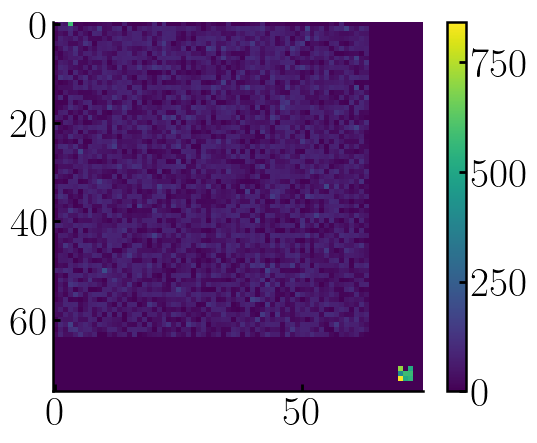

In [4]:
plt_ev = np.zeros((75,75))
for i in range(len(events)):
    plt_ev[events[i].x][events[i].y] += 1
    
plt.imshow(plt_ev)
plt.colorbar()

Text(0.5, 0, 'Time [s]')

/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


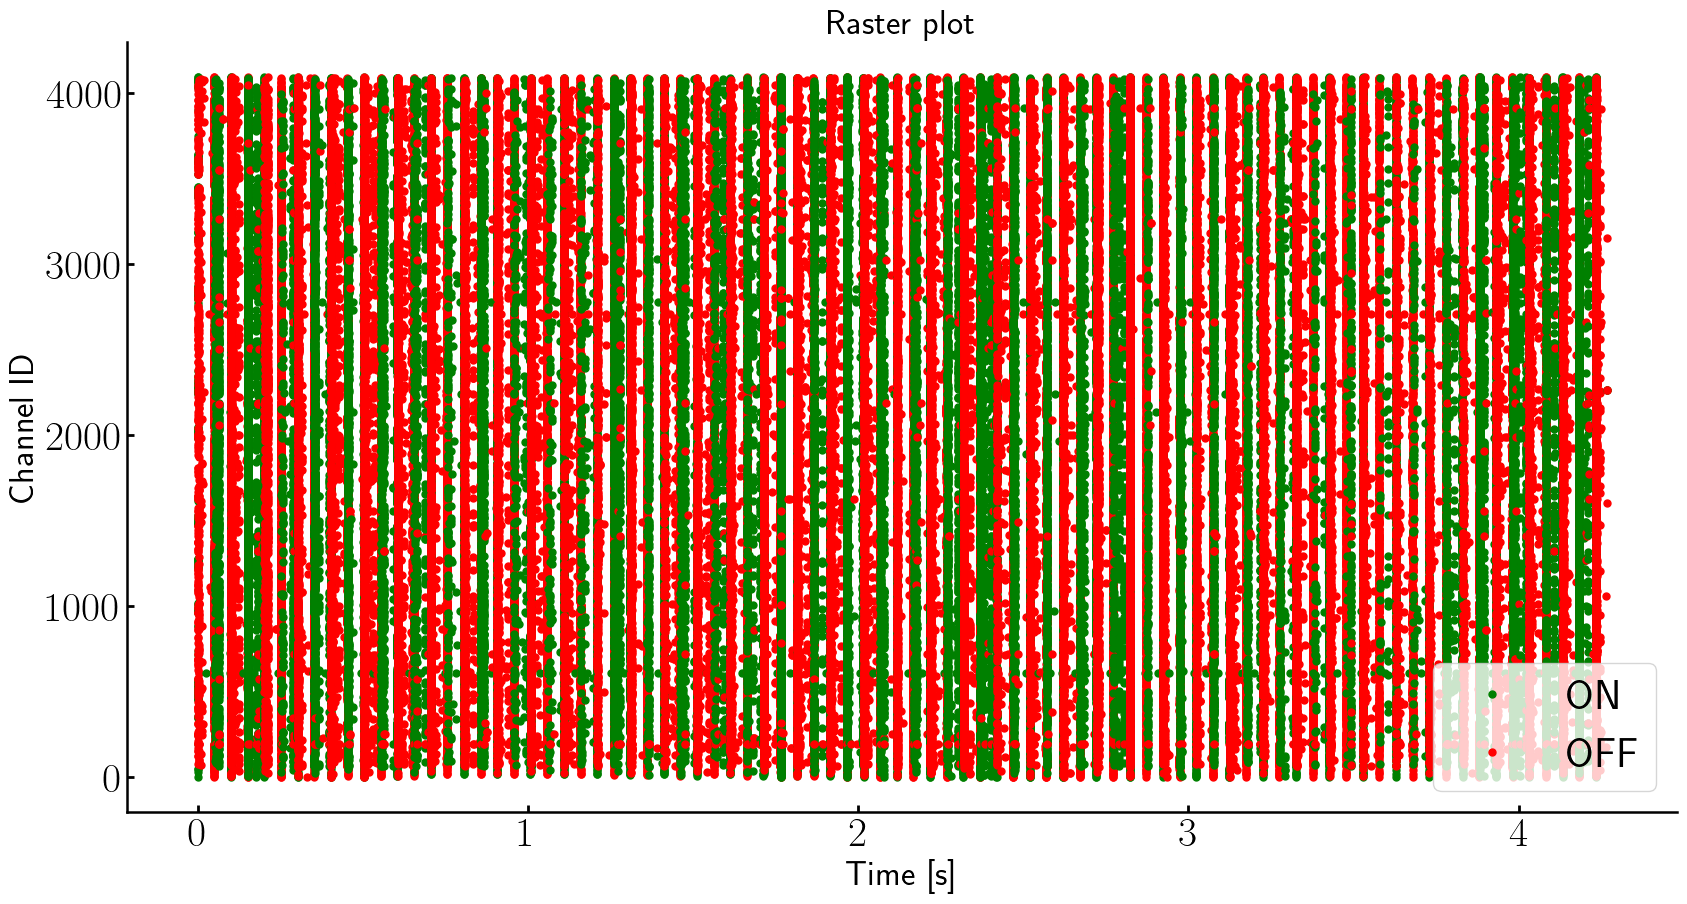

In [12]:
plt.figure(figsize=(20,10))
for e in gaia4096:
    if e.p ==0 :
        plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r.')
    if e.p ==1 :
        plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g.')

plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g.',label = "ON")
plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r.',label = "OFF")

        
plt.legend(prop={'size': 30})
plt.title("Raster plot ")
plt.ylabel("Channel ID")
plt.xlabel("Time [s]")

Text(0.5, 0, 'Time [s]')

/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


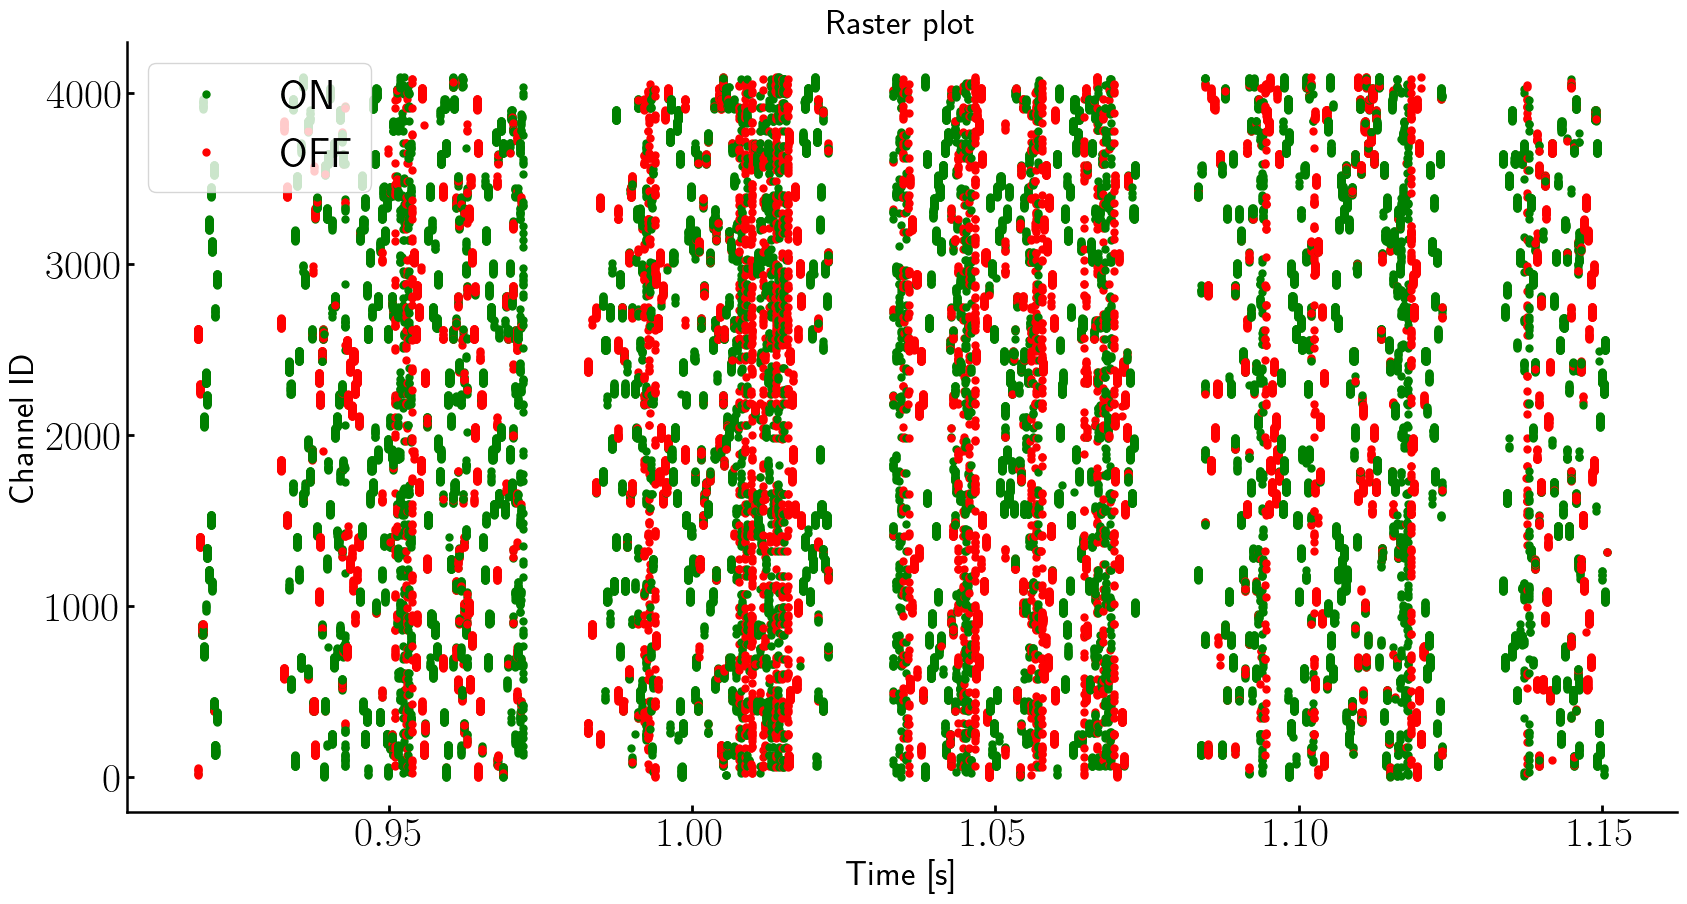

In [20]:
plt.figure(figsize=(20,10))
for e in gaia4096[160000:200000]:
    if e.p ==0 :
        plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r.')
    if e.p ==1 :
        plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g.')

plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g.',label = "ON")
plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r.',label = "OFF")

        
plt.legend(prop={'size': 30})
plt.title("Raster plot")
plt.ylabel("Channel ID")
plt.xlabel("Time [s]")

Text(0.5, 0, 'Time [s]')

/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


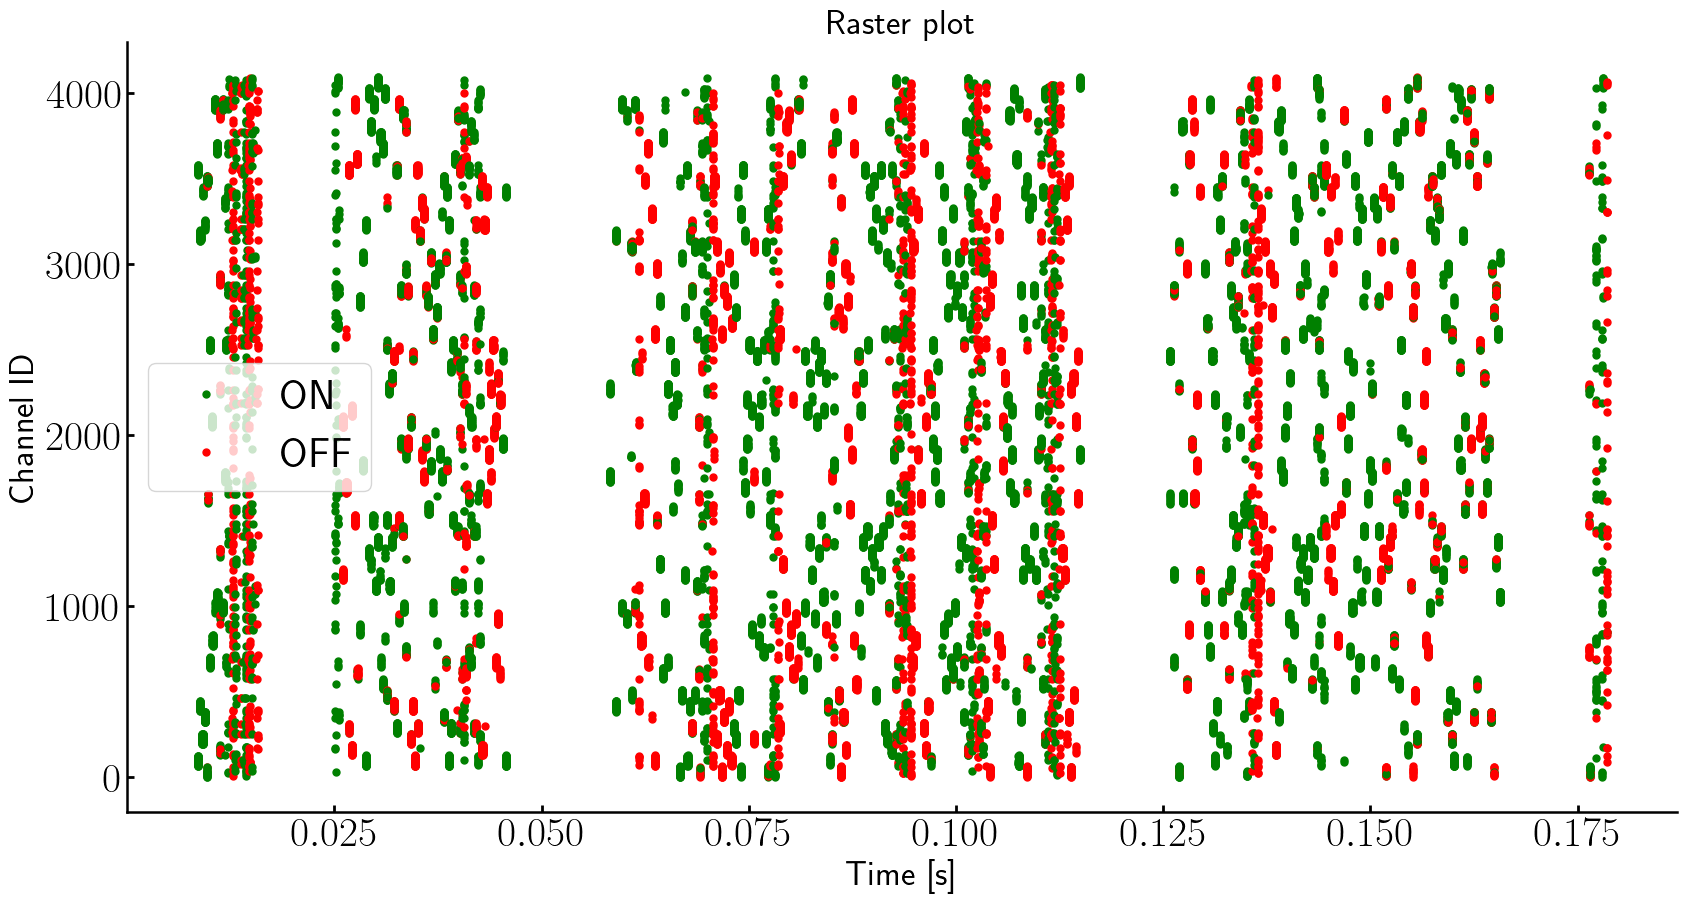

In [28]:
plt.figure(figsize=(20,10))
for e in events[2000:30000]:
    if e.p ==0 :
        plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r.')
    if e.p ==1 :
        plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g.')

plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g.',label = "ON")
plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r.',label = "OFF")

        
plt.legend(prop={'size': 30})
plt.title("Raster plot")
plt.ylabel("Channel ID")
plt.xlabel("Time [s]")

In [13]:
len(gaia4096)

216448

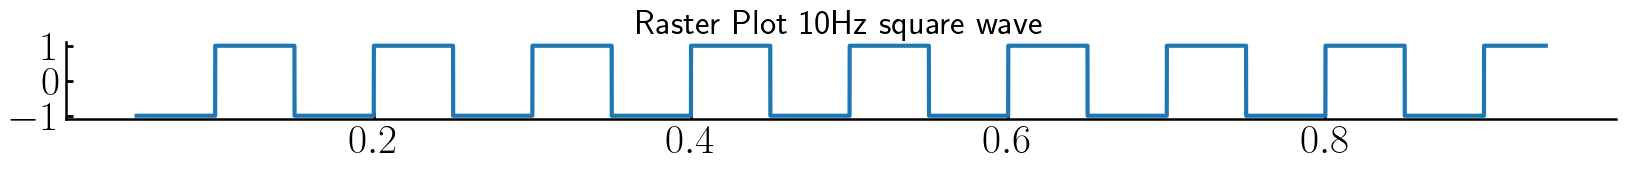

In [11]:
from scipy import signal
t = np.linspace(gaia4096[2000].ts*1e-5,gaia4096[50000].ts*1e-5, len(gaia4096[2000:50000]))
plt.figure(figsize=(20,1))

plt.title("Raster Plot 10Hz square wave")
signal = signal.square(2 * np.pi * 10 * t)
plt.plot(t,signal)

/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Legend does not support 'O' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Legend does not support 'N' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


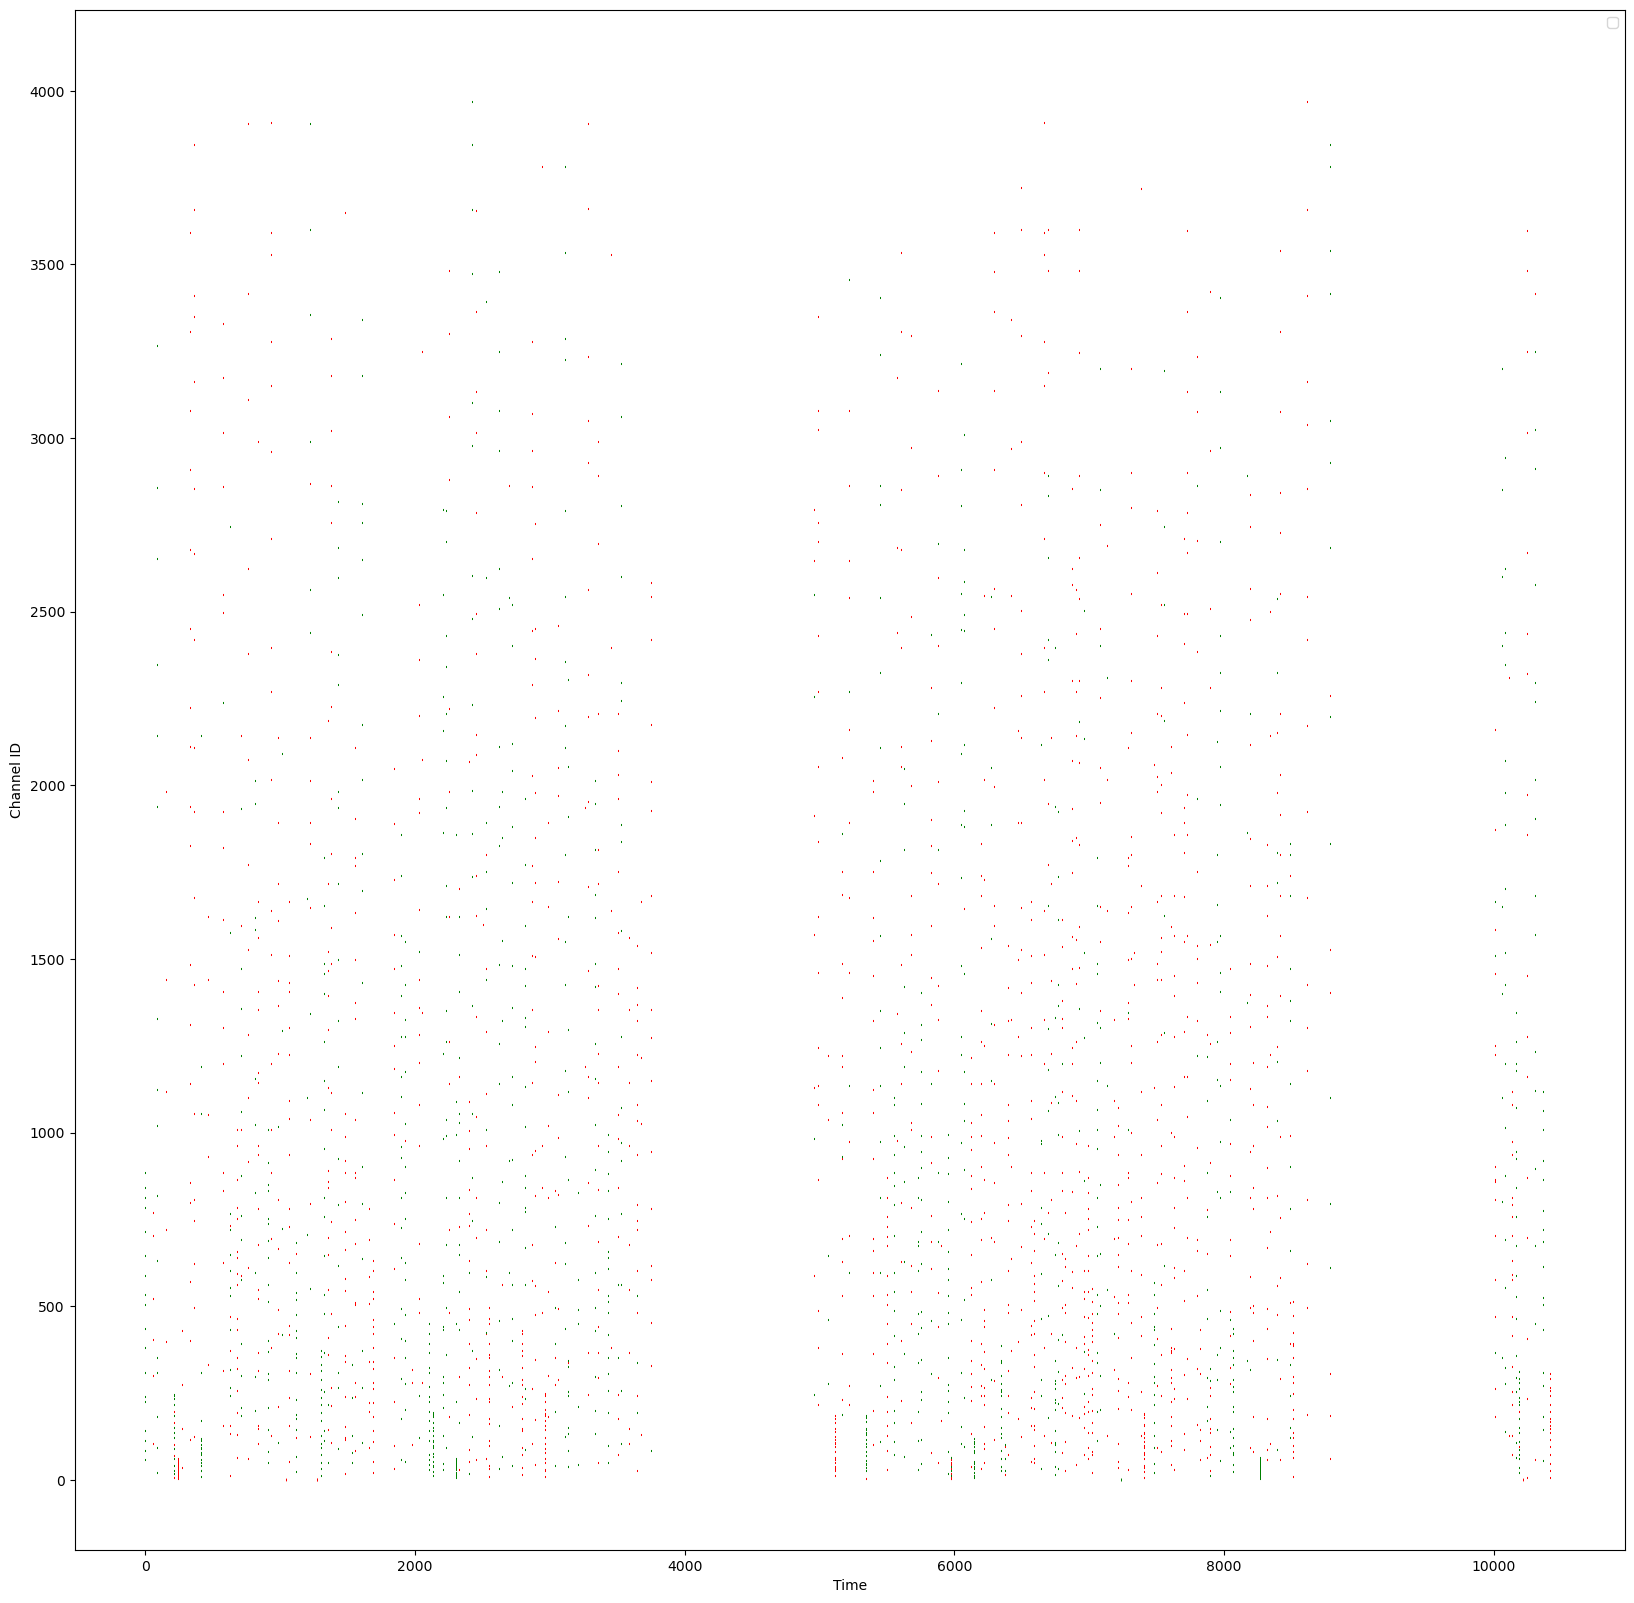

In [33]:
offsets_on = []
positions_on = []
offsets_off = []
positions_off = []

for i in range(20000):
    if gaia4096[i].p == 1:   
        offsets_on.append(gaia4096[i].ts)
        positions_on.append(gaia4096[i].y + gaia4096[i].y*gaia4096[i].x )
    if gaia4096[i].p == 0:   
        offsets_off.append(gaia4096[i].ts)
        positions_off.append(gaia4096[i].y + gaia4096[i].y*gaia4096[i].x )

positions_on =np.array(positions_on)[:,np.newaxis]
offsets_on = np.array(offsets_on)

positions_off =np.array(positions_off)[:,np.newaxis]
offsets_off = np.array(offsets_off) 

plt.figure(figsize=(20,20))
plt.eventplot(positions_on,orientation = 'vertical', lineoffsets=offsets_on, color = 'r')
plt.eventplot(positions_off, orientation = 'vertical',lineoffsets=offsets_off, color = 'g')

plt.xlabel ("Time")
plt.ylabel("Channel ID")
plt.legend("ON", "OFF")
plt.show()

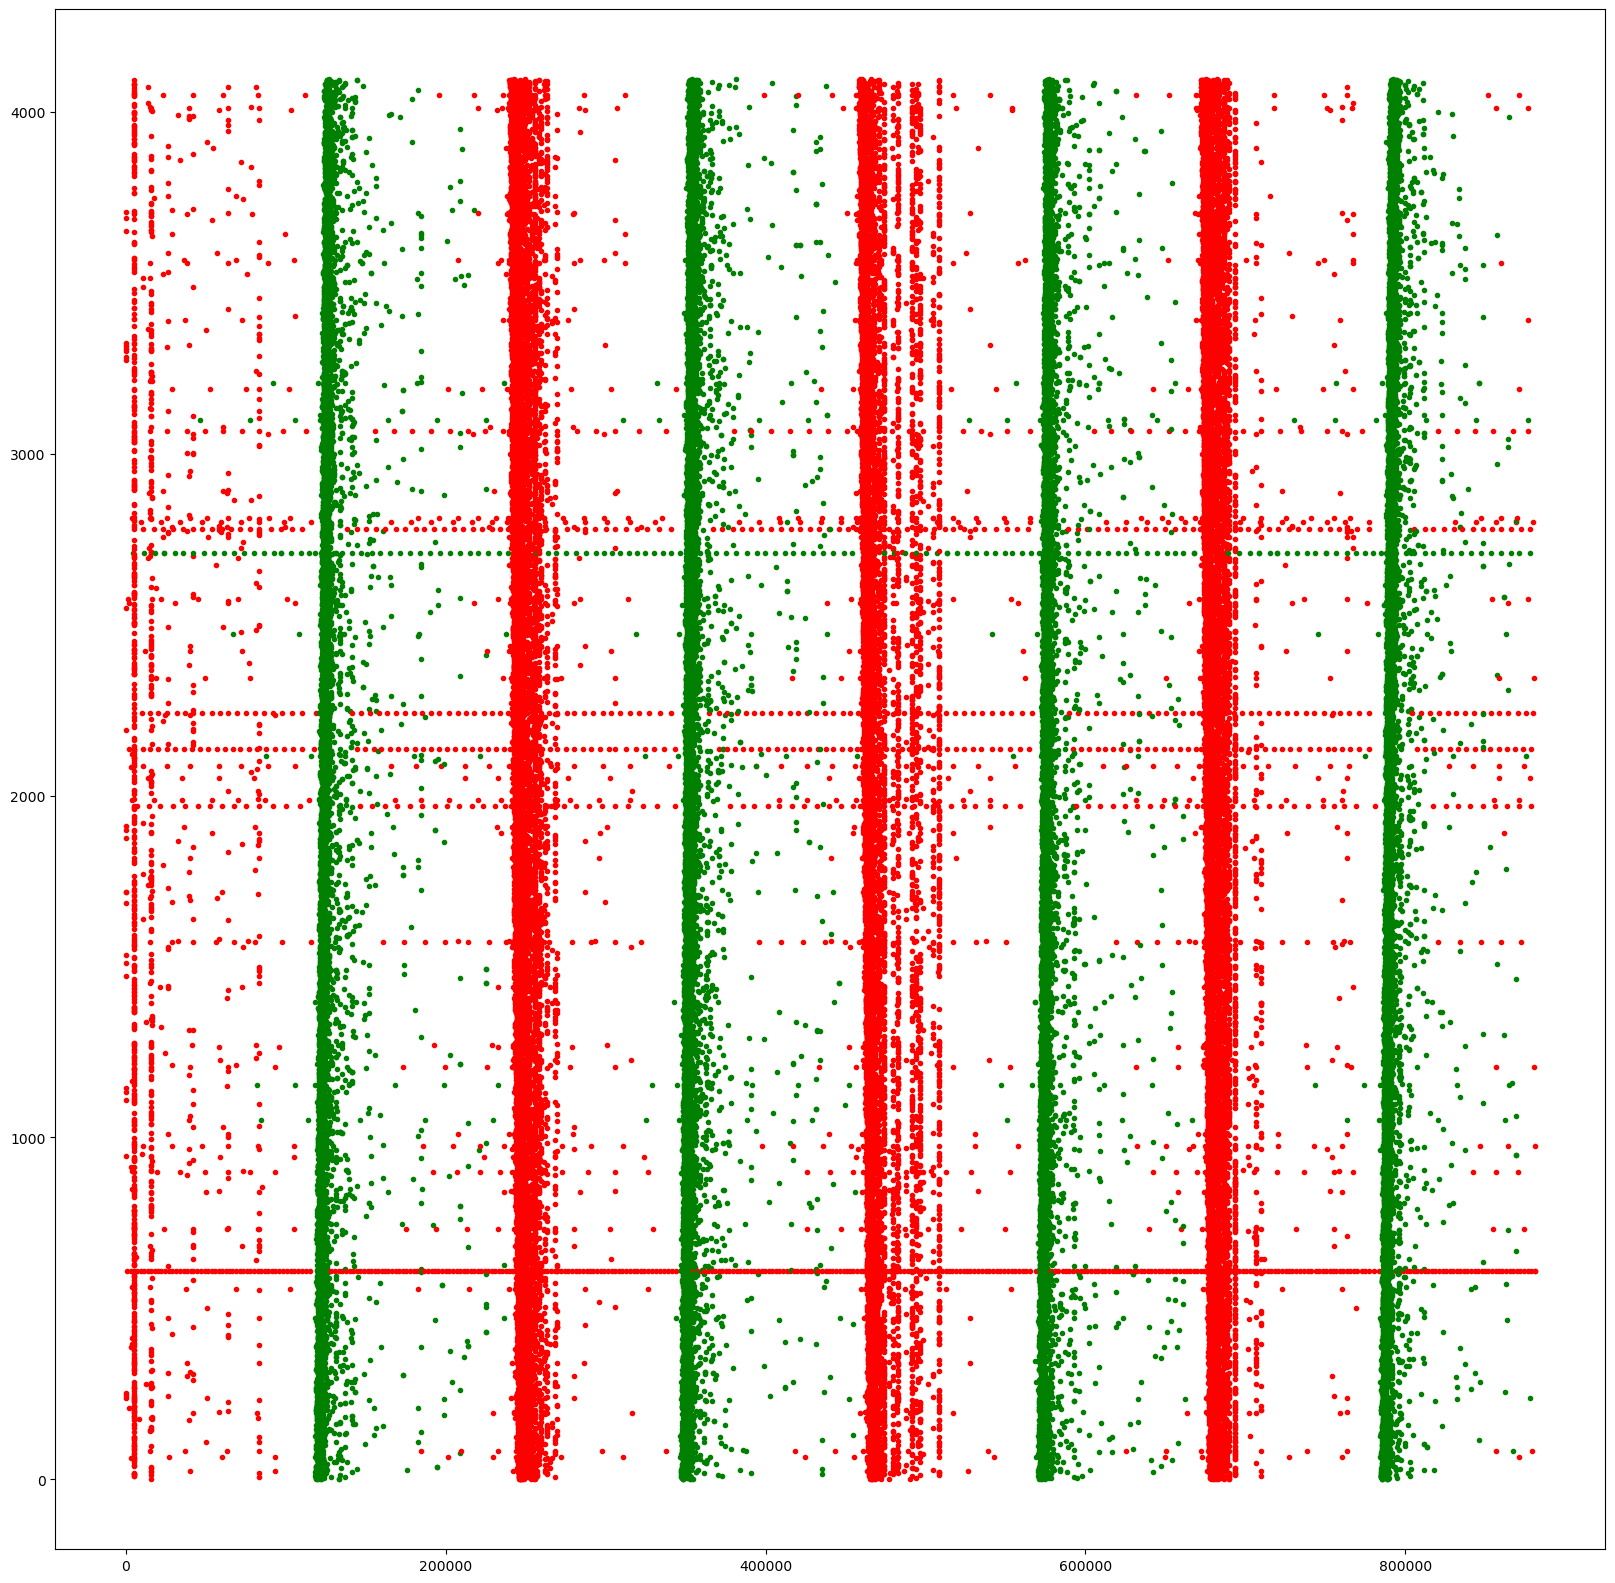

/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'O' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/Users/matteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


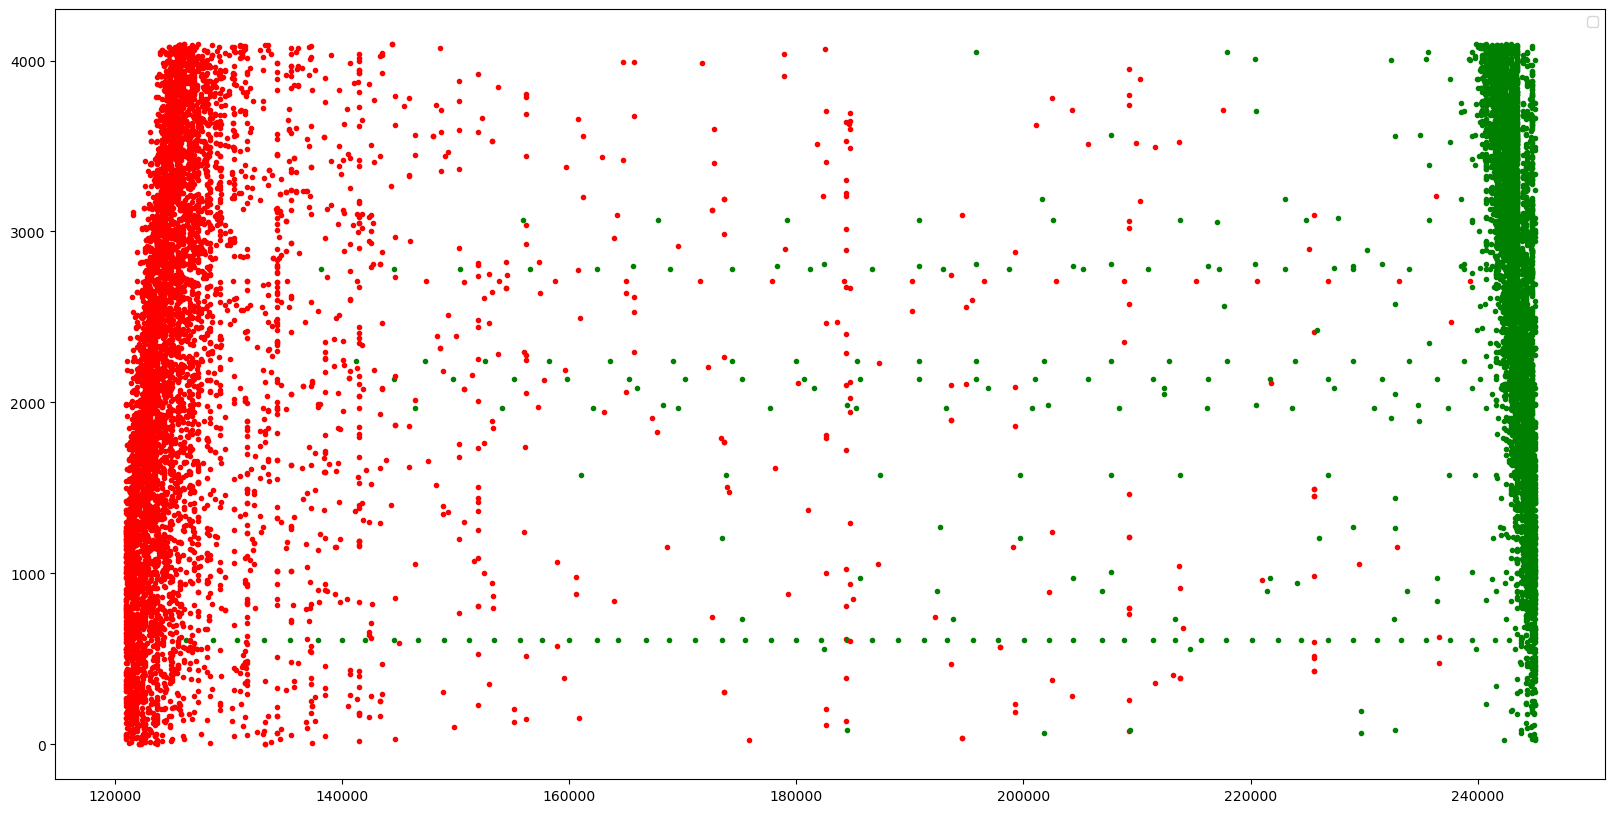